In [1]:
import sys
sys.path.insert(0, "../..")

In [2]:
from MPyDATA_examples.condensational_growth.analysis import figure_data
from MPyDATA_examples.condensational_growth.physics.equilibrium_drop_growth import PdfEvolver
from MPyDATA_examples.condensational_growth.plotter import Plotter
from MPyDATA_examples.utils.error_norms import L2
from MPyDATA_examples.condensational_growth.convergence import convergence_in_time, convergence_in_space

import matplotlib.pyplot as plt
import numpy as np


In [3]:
results, setup = figure_data()

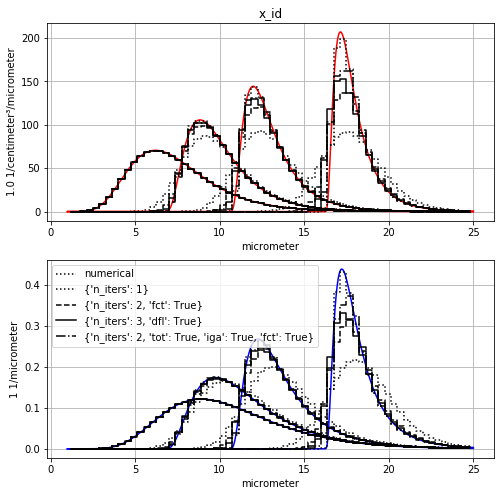

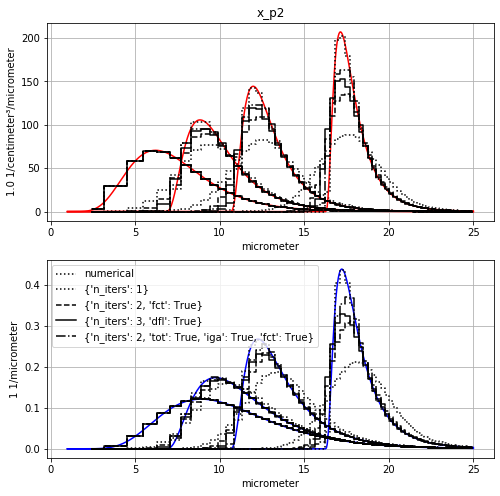

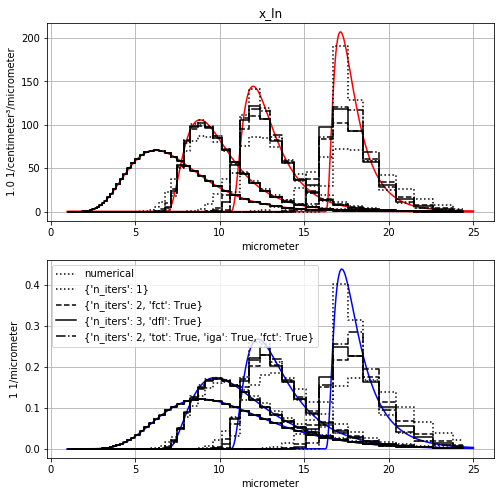

In [4]:
for coord in results.keys():
    plotter = Plotter(setup, coord)
    for opt_i, opts in enumerate(results[coord]['numerical'].keys()): 
        plot_data = results[coord]['numerical'][opts]
        for i in range(len(setup.nt)):
            mnorm = setup.mixing_ratios[i]
            t = setup.nt[i] * setup.dt
            if opt_i == 0:
                plotter.analytical_pdf(PdfEvolver(setup.pdf, setup.drdt, t), mnorm)
                plotter.numerical_pdf(results[coord]['grid']['r'], results[coord]['analytical'][i], bin_boundaries = results[coord]['grid']['rh'], label='numerical', mnorm=mnorm)
            plotter.numerical_pdf(
                results[coord]['grid']['r'], 
                plot_data[i], 
                label=opts, 
                bin_boundaries=results[coord]['grid']['rh'], 
                mnorm=mnorm
            )
    plotter.done()

In [6]:
def convergence_in_space(nr: list, results):
    err_data = {}
    for coord in results.keys():
        err_data[coord] = {}
        for opts in results[coord]["error_L2"].keys():
            err_data[coord][opts] = []

    for nri, nr in enumerate(nrs):
        data, setup = figure_data(nr=nr)
        for coord in data.keys():
            for opts in data[coord]["error_L2"].keys():
                err_data[coord][opts].append(data[coord]["error_L2"][opts])
    return err_data

In [7]:
nrs = [32, 64, 128, 256]  #TODO: do not repeat calc. for default nr!
err_data_nr = convergence_in_space(nr = nrs, results = results)

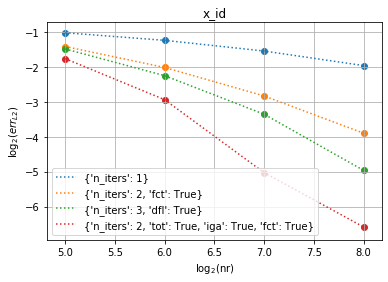

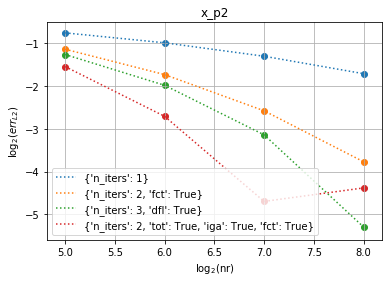

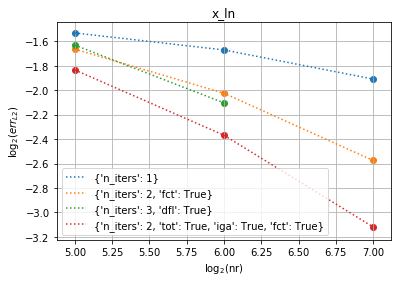

In [31]:
x = np.log2(nrs)
for coord in results.keys():
    for i, opts in enumerate(err_data_nr[coord].keys()):
        plt.plot(x, err_data_nr[coord][opts], label=opts, linestyle=':')
        plt.scatter(x, err_data_nr[coord][opts])
        plt.savefig("err_nr"+str(i)+".pdf", format="pdf")
    plt.title(coord)
    plt.legend()
    plt.gca().set_xlabel('log$_2$(nr)')
    plt.gca().set_ylabel('log$_2(err_{L2})$')
    plt.grid()
    plt.show()

In [13]:
def convergence_in_time(dt: list, results):
    err_data = {}
    for coord in results.keys():
        err_data[coord] = {}
        for opts in results[coord]["error_L2"].keys():
            err_data[coord][opts] = []

    for dti, dt in enumerate(dts):
        data, setup = figure_data(dt=dt)
        for coord in data.keys():
            for opts in data[coord]["error_L2"].keys():
                err_data[coord][opts].append(data[coord]["error_L2"][opts])
    return err_data

In [14]:
dts = [1 , 0.5, .25, .125]
err_data_dt = convergence_in_time(dt = dts, results = results)

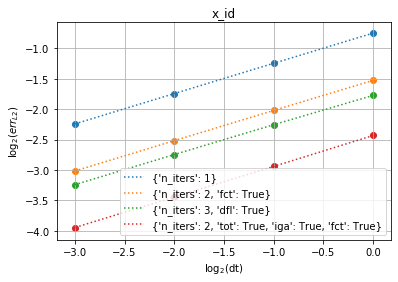

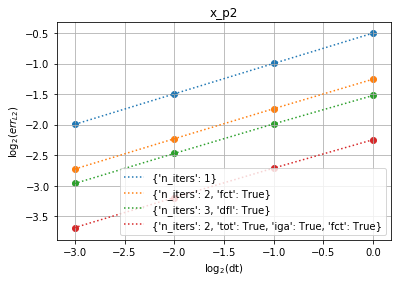

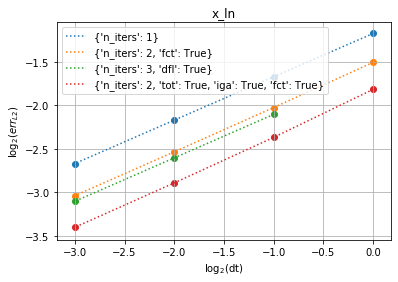

In [34]:
x = np.log2(dts)
for coord in results.keys():
    for i, opts in enumerate(err_data_dt[coord].keys()):  
        plt.scatter(x, err_data_dt[coord][opts])
        plt.title(coord)
        plt.plot(x, err_data_dt[coord][opts], label=opts, linestyle=':')
    plt.gca().set_xlabel('log$_2$(dt)')
    plt.gca().set_ylabel('log$_2(err_{L2})$')     
    plt.legend()
    plt.grid()
    plt.savefig("err_dt"+str(i)+".pdf", format="pdf")
    plt.show()


In [17]:
plt.savefig("test.jpg")

<Figure size 432x288 with 0 Axes>